# Import required libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler

# Define the file path

In [2]:
# Read the CSV file
file_path = 'data/DamAnomaly.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,Level,Temperature_7,Rad01,Tan01,Rad02,Tan02,Rad03,Tan03,Rad04,Tan04,...,Tan24,Rad25,Tan25,Rad26,Tan26,Rad27,Tan27,Rad28,Tan28,Case
0,51.82,5.530000,0.137,-0.718,1.716,-1.301,4.261,-1.974,0.832,-0.359,...,1.501,10.434,1.715,12.016,1.467,0.495,1.162,2.554,1.092,0
1,49.74,3.885000,0.309,-0.591,1.411,-1.523,4.409,-1.928,0.954,-0.496,...,1.353,10.021,1.554,11.750,1.152,0.285,0.989,2.323,1.183,0
2,49.20,4.166667,0.377,-0.534,1.568,-1.431,4.020,-1.990,0.910,-0.538,...,1.141,9.964,1.349,11.428,1.192,0.237,0.873,2.478,1.157,0
3,45.81,4.225000,0.043,-0.730,1.399,-1.399,4.137,-1.887,1.021,-0.323,...,1.157,9.306,1.381,11.240,1.075,0.285,1.198,2.452,1.184,0
4,48.38,3.742000,-0.047,-0.649,1.514,-1.446,3.895,-1.712,1.048,-0.381,...,1.291,9.574,1.250,11.048,1.245,0.422,0.892,2.400,1.169,0


In [4]:
data.tail()

,Level,Temperature_7,Rad01,Tan01,Rad02,Tan02,Rad03,Tan03,Rad04,Tan04,...,Tan24,Rad25,Tan25,Rad26,Tan26,Rad27,Tan27,Rad28,Tan28,Case
8763,56.20,2.956,-0.463,-0.448,0.894,-1.225,2.304,-1.433,0.750,-0.389,...,0.989,6.847,1.618,7.758,1.221,0.106,0.673,0.991,0.844,4
8764,56.06,2.161,-0.173,-0.468,0.856,-1.406,2.470,-1.608,0.756,-0.268,...,1.220,7.049,1.592,8.217,1.408,0.118,0.750,1.150,0.985,4
8765,54.68,2.103,-0.226,-0.353,0.891,-1.086,2.323,-1.647,0.859,-0.158,...,0.999,6.978,1.618,8.066,1.093,0.192,0.675,1.160,1.010,4
8766,53.84,1.897,-0.261,-0.579,0.808,-1.317,2.492,-1.555,0.836,-0.414,...,1.204,6.775,1.483,8.089,1.255,0.069,0.507,0.967,0.867,4
8767,50.53,1.733,-0.142,-0.562,0.666,-1.172,2.369,-1.388,0.817,-0.151,...,1.032,6.911,1.617,8.139,1.115,0.076,0.605,1.092,0.737,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8768 entries, 0 to 8767
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Level          8768 non-null   float64
 1   Temperature_7  8768 non-null   float64
 2   Rad01          8768 non-null   float64
 3   Tan01          8768 non-null   float64
 4   Rad02          8768 non-null   float64
 5   Tan02          8768 non-null   float64
 6   Rad03          8768 non-null   float64
 7   Tan03          8768 non-null   float64
 8   Rad04          8768 non-null   float64
 9   Tan04          8768 non-null   float64
 10  Rad05          8768 non-null   float64
 11  Tan05          8768 non-null   float64
 12  Rad06          8768 non-null   float64
 13  Tan06          8768 non-null   float64
 14  Rad07          8768 non-null   float64
 15  Tan07          8768 non-null   float64
 16  Rad08          8768 non-null   float64
 17  Tan08          8768 non-null   float64
 18  Rad09   

# Data Split

We define variables

Defines constants used to partition the data:

days_per_year: Number of days in a year.

train_days: Amount of data (in days) for the training set (2 years).

val_days: Amount of data (in days) for the validation set (2 months).

In [6]:
# Define the number of days for each period
days_per_year = 365
train_days = 2 * days_per_year
val_days = 2 * 30  # Approximately 2 months

**Crear la función para particionar los datos**

Defines a function that filters and splits the data into training and validation sets for the specified cases.

Filters the data by case.

Selects the first train_days rows as training data.

Selects the following val_days rows as validation data.

Combines the selected data from all cases into two separate sets.

In [7]:
# Function to obtain the training and validation data
def get_data_for_cases(data, cases, train_days, val_days):
    train_data = pd.DataFrame()
    val_data = pd.DataFrame()
    
    for case in cases:
        case_data = data[data['Case'] == case]
        train_data = pd.concat([train_data, case_data.iloc[:train_days]])
        val_data = pd.concat([val_data, case_data.iloc[train_days:train_days + val_days]])
    
    return train_data, val_data

**Split the data into training and validation sets**

Calls the get_data_for_cases function to split the data into training and validation sets.

Processes the specified cases ('0', '1a', '2a', '3a', '4').

Creates two DataFrames:

train_data: Contains the first 2 years of data for each case.

val_data: Contains the next 2 months of data for each case.

In [8]:
# Get the training and validation data for the specified cases
train_data, val_data = get_data_for_cases(data, ['0', '1a', '2a', '3a', '4'], train_days, val_days)

**Test sets**

Cases 0, 1a, 2a, 3a, 4:

For these cases, select the rows that correspond to data after the defined training and validation period (train_days + val_days).

This ensures that the test data does not overlap with data previously used for the model.

Cases 1b, 2b, 3b:

For these cases, use all available data in the unpartitioned dataset, treating them entirely as test sets.

In [9]:
# Create the test datasets as specified
test_data_0 = data[data['Case'] == '0'].iloc[train_days + val_days:]
test_data_1a = data[(data['Case'] == '1a')].iloc[train_days + val_days:]
test_data_2a = data[(data['Case'] == '2a')].iloc[train_days + val_days:]
test_data_3a = data[(data['Case'] == '3a')].iloc[train_days + val_days:]
test_data_4 = data[(data['Case'] == '4')].iloc[train_days + val_days:]
test_data_1b = data[data['Case'] == '1b']
test_data_2b = data[data['Case'] == '2b']
test_data_3b = data[data['Case'] == '3b']

# Data normalization

This cell defines a function called normalize_min_max that normalizes (scales) the numerical values ​​of multiple data sets (training, validation, and test) using the Min-Max Scaling method. Normalization is performed as follows:

**Training-based scaler:**

The function uses the MinMaxScaler from the sklearn library to scale the data to an interval [0, 1].
The scaler is fitted using only the training data set, ensuring that the normalization does not use information from the validation or test data, preserving the integrity of the model.

**Applying normalization:**

Once fitted, the scaler is used to transform the training, validation, and each test set (test_data_0, test_data_1a, etc.).

The Case column is not normalized, as it is a categorical variable.

**Copy of datasets:**

Before applying the transformations, copies of each dataset are created to avoid modifying the original data.

**Output:**

The function returns the normalized datasets as tuples. This includes the training set, the validation set, and the test sets for the different cases.

In [10]:
def normalize_min_max(train_data, val_data, test_data_0, test_data_1a, test_data_2a, test_data_3a, test_data_4, test_data_1b, test_data_2b, test_data_3b):
    scaler = MinMaxScaler()
    
    # Adjust the scaler only on the training set
    scaler.fit(train_data.drop(columns=['Case']))
    
    # Apply normalization to the training and validation set
    train_data_scaled = train_data.copy()
    val_data_scaled = val_data.copy()
    
    train_data_scaled.iloc[:, :-1] = scaler.transform(train_data.drop(columns=['Case']))
    val_data_scaled.iloc[:, :-1] = scaler.transform(val_data.drop(columns=['Case']))
    
    # Apply normalization to each test set individually
    test_data_0_scaled = test_data_0.copy()
    test_data_1a_scaled = test_data_1a.copy()
    test_data_2a_scaled = test_data_2a.copy()
    test_data_3a_scaled = test_data_3a.copy()
    test_data_4_scaled = test_data_4.copy()
    test_data_1b_scaled = test_data_1b.copy()
    test_data_2b_scaled = test_data_2b.copy()
    test_data_3b_scaled = test_data_3b.copy()
    
    test_data_0_scaled.iloc[:, :-1] = scaler.transform(test_data_0.drop(columns=['Case']))
    test_data_1a_scaled.iloc[:, :-1] = scaler.transform(test_data_1a.drop(columns=['Case']))
    test_data_2a_scaled.iloc[:, :-1] = scaler.transform(test_data_2a.drop(columns=['Case']))
    test_data_3a_scaled.iloc[:, :-1] = scaler.transform(test_data_3a.drop(columns=['Case']))
    test_data_4_scaled.iloc[:, :-1] = scaler.transform(test_data_4.drop(columns=['Case']))
    test_data_1b_scaled.iloc[:, :-1] = scaler.transform(test_data_1b.drop(columns=['Case']))
    test_data_2b_scaled.iloc[:, :-1] = scaler.transform(test_data_2b.drop(columns=['Case']))
    test_data_3b_scaled.iloc[:, :-1] = scaler.transform(test_data_3b.drop(columns=['Case']))
    
    return (train_data_scaled, val_data_scaled, test_data_0_scaled, test_data_1a_scaled,
            test_data_2a_scaled, test_data_3a_scaled, test_data_4_scaled,
            test_data_1b_scaled, test_data_2b_scaled, test_data_3b_scaled)

In [11]:
# Normalize data sets
(train_data_scaled, val_data_scaled, test_data_0_scaled, test_data_1a_scaled,
 test_data_2a_scaled, test_data_3a_scaled, test_data_4_scaled,
 test_data_1b_scaled, test_data_2b_scaled, test_data_3b_scaled) = normalize_min_max(
    train_data, val_data, test_data_0, test_data_1a, test_data_2a, test_data_3a, test_data_4,
    test_data_1b, test_data_2b, test_data_3b)

C:\Users\Christian\.conda\envs\Pytorch\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Christian\.conda\envs\Pytorch\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Christian\.conda\envs\Pytorch\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Christian\.conda\envs\Pytorch\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [12]:
# Display some rows from the normalized sets for verification
print("Normalized Training Set:")
train_data_scaled.head()

Normalized Training Set:


,Level,Temperature_7,Rad01,Tan01,Rad02,Tan02,Rad03,Tan03,Rad04,Tan04,...,Tan24,Rad25,Tan25,Rad26,Tan26,Rad27,Tan27,Rad28,Tan28,Case
0,0.173288,0.473945,0.781788,0.407407,0.662109,0.549609,0.813411,0.466352,0.460159,0.582251,...,0.453426,0.744621,0.375486,0.783727,0.261942,0.874754,0.787714,0.953089,0.434783,0
1,0.118923,0.405369,0.922888,0.528015,0.569432,0.416115,0.836597,0.486069,0.541169,0.433983,...,0.374197,0.710444,0.305999,0.765037,0.138606,0.737049,0.653188,0.893873,0.488982,0
2,0.104809,0.417111,0.978671,0.582146,0.617138,0.471437,0.775654,0.459494,0.511952,0.388528,...,0.260707,0.705727,0.217523,0.742411,0.154268,0.705574,0.562986,0.933607,0.473496,0
3,0.016205,0.419543,0.704676,0.396011,0.565785,0.490679,0.793984,0.503643,0.585657,0.621212,...,0.269272,0.651274,0.231334,0.729202,0.108457,0.737049,0.815708,0.926942,0.489577,0
4,0.083377,0.399408,0.630845,0.472934,0.600729,0.462417,0.756071,0.578654,0.603586,0.558442,...,0.341006,0.673452,0.174795,0.715711,0.175020,0.826885,0.577760,0.913612,0.480643,0


In [13]:
print("\nNormalized Validation Set:")
val_data_scaled.head()


Normalized Validation Set:


,Level,Temperature_7,Rad01,Tan01,Rad02,Tan02,Rad03,Tan03,Rad04,Tan04,...,Tan24,Rad25,Tan25,Rad26,Tan26,Rad27,Tan27,Rad28,Tan28,Case
730,0.720857,0.320577,0.504512,0.493827,0.667274,0.360192,0.697478,0.332619,0.759628,0.391775,...,0.480193,0.713836,0.633578,0.714798,0.619421,0.604590,0.699844,0.699308,0.553901,0
731,0.720857,0.284309,0.680066,0.237417,0.665755,0.414311,0.644995,0.323618,0.720452,0.420996,...,0.417559,0.710526,0.596893,0.700183,0.509397,0.558033,0.542768,0.659062,0.625372,0
732,0.678515,0.318826,0.564397,0.493827,0.586144,0.318100,0.645778,0.332619,0.587649,0.537879,...,0.533726,0.653840,0.541217,0.652544,0.478857,0.521311,0.577760,0.630864,0.494342,0
733,0.682436,0.341254,0.695652,0.361823,0.562139,0.436560,0.604731,0.405058,0.766932,0.457792,...,0.457709,0.626117,0.497195,0.659078,0.489428,0.537705,0.677294,0.655729,0.555688,0
734,0.698118,0.386693,0.692371,0.514720,0.541477,0.392664,0.597211,0.426918,0.826029,0.491342,...,0.461456,0.634475,0.644799,0.629567,0.517228,0.544262,0.621306,0.653166,0.528291,0


#### Variance Threshold - Remove Low Var Features

Variance threshold method removes features whose variance below a pre-defined cutoff value. It is based on the notion that features that do not vary much within themselves have low predictive power. The main weakness of variance threshold is that it does not consider the relationship of input features with the output feature.

It should be noted that, before performing variance thresholding, all features should be standardized so they will have the same scale.

Scikit-learn provides VarianceThreshold function to perform variance threshold method.

Variance Threshold Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

In [14]:
from sklearn.feature_selection import VarianceThreshold

df_var = VarianceThreshold()

In [15]:
training_variance = train_data_scaled.drop(['Case', 'Temperature_7', 'Level'], inplace = False, axis=1)

In [16]:
training_variance.head()

,Rad01,Tan01,Rad02,Tan02,Rad03,Tan03,Rad04,Tan04,Rad05,Tan05,...,Rad24,Tan24,Rad25,Tan25,Rad26,Tan26,Rad27,Tan27,Rad28,Tan28
0,0.781788,0.407407,0.662109,0.549609,0.813411,0.466352,0.460159,0.582251,0.391831,0.533177,...,0.523580,0.453426,0.744621,0.375486,0.783727,0.261942,0.874754,0.787714,0.953089,0.434783
1,0.922888,0.528015,0.569432,0.416115,0.836597,0.486069,0.541169,0.433983,0.279627,0.425449,...,0.505047,0.374197,0.710444,0.305999,0.765037,0.138606,0.737049,0.653188,0.893873,0.488982
2,0.978671,0.582146,0.617138,0.471437,0.775654,0.459494,0.511952,0.388528,0.285426,0.412959,...,0.461052,0.260707,0.705727,0.217523,0.742411,0.154268,0.705574,0.562986,0.933607,0.473496
3,0.704676,0.396011,0.565785,0.490679,0.793984,0.503643,0.585657,0.621212,0.216591,0.470726,...,0.431370,0.269272,0.651274,0.231334,0.729202,0.108457,0.737049,0.815708,0.926942,0.489577
4,0.630845,0.472934,0.600729,0.462417,0.756071,0.578654,0.603586,0.558442,0.239284,0.554254,...,0.442821,0.341006,0.673452,0.174795,0.715711,0.175020,0.826885,0.577760,0.913612,0.480643


In [17]:
# Perform variance thresholding
df_var.fit_transform(training_variance)

C:\Users\Christian\.conda\envs\Pytorch\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Christian\.conda\envs\Pytorch\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Christian\.conda\envs\Pytorch\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Christian\.conda\envs\Pytorch\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

array([[0.78178835, 0.40740741, 0.66210878, ..., 0.78771384, 0.95308895,
        0.43478261],
       [0.92288761, 0.52801519, 0.56943178, ..., 0.65318818, 0.89387337,
        0.48898154],
       [0.97867104, 0.58214625, 0.61713765, ..., 0.562986  , 0.93360677,
        0.47349613],
       ...,
       [0.79573421, 0.3048433 , 0.62443026, ..., 0.71228616, 0.66470136,
        0.60810006],
       [0.79245283, 0.31054131, 0.6323306 , ..., 0.73561431, 0.66162522,
        0.62239428],
       [0.63494668, 0.41595442, 0.59191735, ..., 0.67884914, 0.73160728,
        0.75282906]])

In [18]:
# Print the name and variance of each feature
for feature in zip(training_variance.columns, df_var.variances_):
    print(feature)

('Rad01', 0.03425374320657714)
('Tan01', 0.02409892694567664)
('Rad02', 0.031126372034630874)
('Tan02', 0.03155485634939753)
('Rad03', 0.044135554882497846)
('Tan03', 0.03854656479986066)
('Rad04', 0.03231061617542348)
('Tan04', 0.02321569853303147)
('Rad05', 0.04718693210686541)
('Tan05', 0.030141169146838218)
('Rad06', 0.045404111930824956)
('Tan06', 0.029738214444230752)
('Rad07', 0.0406295503406223)
('Tan07', 0.03685580956872615)
('Rad08', 0.03869321295265281)
('Tan08', 0.018638373415473912)
('Rad09', 0.043431883267134604)
('Tan09', 0.029722716285670112)
('Rad10', 0.05760708901863981)
('Tan10', 0.0357349874421873)
('Rad11', 0.046235730409641004)
('Tan11', 0.03767664622110931)
('Rad12', 0.03638067975998423)
('Tan12', 0.019727742059272364)
('Rad13', 0.04260916862456541)
('Tan13', 0.022847046953973115)
('Rad14', 0.04767622727915504)
('Tan14', 0.028459004448940537)
('Rad15', 0.03932673615252778)
('Tan15', 0.029626644005373477)
('Rad16', 0.039248931109090585)
('Tan16', 0.026187296454153

In [19]:
# Create the 'Figures' folder if it doesn't exist
if not os.path.exists('pre_process_figures'):
    os.makedirs('pre_process_figures')

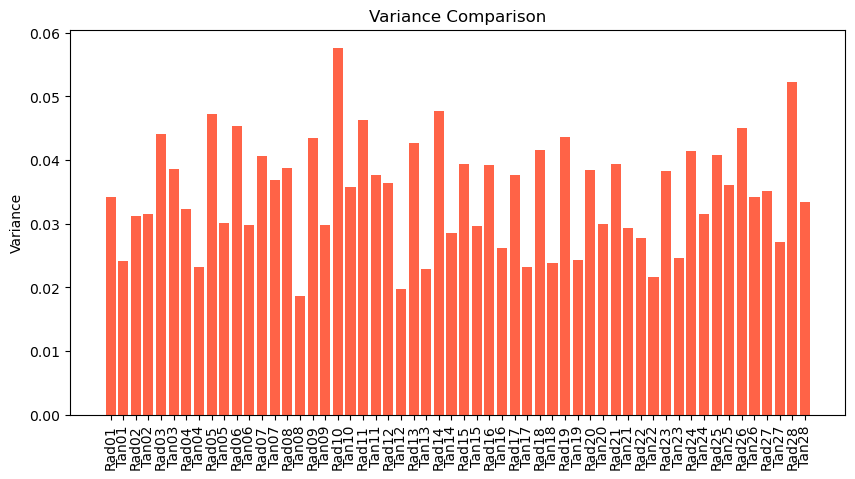

In [20]:
# Create a bar chart for visualizing the variances
plt.figure(figsize=(10,5))
plt.bar(x=training_variance.columns, height=df_var.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

# Save the figure in EPS format
plt.savefig('pre_process_figures/variance_comparison.eps', format='eps', bbox_inches='tight')

plt.show()

# Data Reshape

This cell defines the create_enriched_data_with_indices function, which transforms a time series dataset into an enriched format using sliding windows. The function takes an original dataset and generates a new DataFrame in which each row corresponds to a window of consecutive data, spanning a time range defined by the window size.

**For each window:**

The values ​​of the selected columns are concatenated over time into a single enriched row.

The corresponding case label is added to the end of the row.

The original index information for the rows used in each window is saved.

**The function returns:**

An enriched DataFrame with the data in the transformed format, including the case labels.

An index DataFrame that allows you to trace the original rows used to construct each window.

This process is useful for capturing temporal patterns in the data and preparing the dataset for machine learning models that require a structured time series representation.

In [21]:
def create_enriched_data_with_indices(df, window_size=7, stride=1):
    enriched_data = []
    indices = []
    columns = df.columns[:-1]  # Exclude the 'Case' column
    cases = df['Case'].unique()  # Get the unique cases
    
    for case in cases:
        case_data = df[df['Case'] == case]
        case_length = len(case_data)
        
        # Loop through each window of size `window_size` with a `stride` of 1
        for start in range(0, case_length - window_size + 1, stride):
            end = start + window_size
            window = case_data.iloc[start:end]
            
            enriched_row = []
            for col in columns:
                enriched_row.extend(window[col].values)
            
            enriched_row.append(case)  # Add the 'Case' label of the current case
            enriched_data.append(enriched_row)
            indices.append(window.index.values)  # Save the original indexes
    
    # Create a DataFrame with the enriched data
    new_columns = [f"{col}_t{i}" for col in columns for i in range(window_size)]
    new_columns.append('Case')
    enriched_df = pd.DataFrame(enriched_data, columns=new_columns)
    
    # Create a DataFrame with the original indexes
    indices_df = pd.DataFrame(indices)
    
    return enriched_df, indices_df

In [22]:
# Apply the enrichment function to each dataset
train_sequence, train_indices = create_enriched_data_with_indices(train_data_scaled)
val_sequence, val_indices = create_enriched_data_with_indices(val_data_scaled)
test_sequence_0, test_indices_0 = create_enriched_data_with_indices(test_data_0_scaled)
test_sequence_1a, test_indices_1a = create_enriched_data_with_indices(test_data_1a_scaled)
test_sequence_2a, test_indices_2a = create_enriched_data_with_indices(test_data_2a_scaled)
test_sequence_3a, test_indices_3a = create_enriched_data_with_indices(test_data_3a_scaled)
test_sequence_4, test_indices_4 = create_enriched_data_with_indices(test_data_4_scaled)
test_sequence_1b, test_indices_1b = create_enriched_data_with_indices(test_data_1b_scaled)
test_sequence_2b, test_indices_2b = create_enriched_data_with_indices(test_data_2b_scaled)
test_sequence_3b, test_indices_3b = create_enriched_data_with_indices(test_data_3b_scaled)

In [23]:
len(train_sequence)

3620

In [24]:
len(val_sequence)

270

In [25]:
len(test_sequence_0)

300

In [26]:
len(test_sequence_1b)

1090

# Data Reshape 3D

This cell defines the transform_sequence_and_extract_cases_with_indices function, which converts a dataset enriched by sliding windows into a format suitable for deep learning models that require inputs in multiple dimensions (such as convolutional or recurrent networks).

**The function performs three key operations:**

**Data Transformation:** Reorganizes measurements into a structured format (n_samples, num_sensors, window_size) to capture temporal and per-sensor relationships.

**Label Separation:** Extracts case labels into a separate array.

**Traceability:** Retains the original indices used in constructing each window.

This process prepares the data for use in advanced models while ensuring that the original information can be traced.

In [27]:
def transform_sequence_and_extract_cases_with_indices(df, indices_df, case_column='Case', window_size=7):
    """
Transforms a sequential DataFrame into a 4D format, extracts the case column, and maintains the original indexes.

Parameters:
df (pd.DataFrame): Input DataFrame containing the measurements and the case column.
indices_df (pd.DataFrame): DataFrame containing the original sequence indexes.
case_column (str): Name of the column containing the cases. Default is 'Case'.
window_size (int): Window size. Default is 7.

Returns:
tuple: A tuple containing the transformed 4D array, the case matrix, and the original indexes.
"""
    # Extract the 'Case' column
    cases = df[case_column].values

    # Remove the 'Case' column from the DataFrame
    df_data = df.drop(columns=[case_column])

    # Convert to numpy array
    df_array = df_data.values

    # Calculate the number of sensors
    num_sensors = df_data.shape[1] // window_size

    # Transform to desired shape (n_samples, num_sensors, 1, window_size)
    df_reshaped = df_array.reshape((df_array.shape[0], num_sensors, window_size))

    # Convert indexes to numpy array
    indices_array = indices_df.values

    return df_reshaped, cases, indices_array

In [28]:
# Ejemplo de uso con todas las secuencias creadas previamente
train_matrices_3d, train_cases, train_indices_array = transform_sequence_and_extract_cases_with_indices(train_sequence, train_indices)
val_matrices_3d, val_cases, val_indices_array = transform_sequence_and_extract_cases_with_indices(val_sequence, val_indices)
test_matrices_3d_0, test_cases_0, test_indices_array_0 = transform_sequence_and_extract_cases_with_indices(test_sequence_0, test_indices_0)
test_matrices_3d_1a, test_cases_1a, test_indices_array_1a = transform_sequence_and_extract_cases_with_indices(test_sequence_1a, test_indices_1a)
test_matrices_3d_2a, test_cases_2a, test_indices_array_2a = transform_sequence_and_extract_cases_with_indices(test_sequence_2a, test_indices_2a)
test_matrices_3d_3a, test_cases_3a, test_indices_array_3a = transform_sequence_and_extract_cases_with_indices(test_sequence_3a, test_indices_3a)
test_matrices_3d_4, test_cases_4, test_indices_array_4 = transform_sequence_and_extract_cases_with_indices(test_sequence_4, test_indices_4)
test_matrices_3d_1b, test_cases_1b, test_indices_array_1b = transform_sequence_and_extract_cases_with_indices(test_sequence_1b, test_indices_1b)
test_matrices_3d_2b, test_cases_2b, test_indices_array_2b = transform_sequence_and_extract_cases_with_indices(test_sequence_2b, test_indices_2b)
test_matrices_3d_3b, test_cases_3b, test_indices_array_3b = transform_sequence_and_extract_cases_with_indices(test_sequence_3b, test_indices_3b)

# SAVE FILES

In [29]:
# Create the 'Figures' folder if it doesn't exist
if not os.path.exists('data_split'):
    os.makedirs('data_split')

In [30]:
# Save matrices and labels in .npy files
np.save('data_split/train_matrices.npy', train_matrices_3d)
np.save('data_split/val_matrices.npy', val_matrices_3d)
np.save('data_split/test_matrices_0.npy', test_matrices_3d_0)
np.save('data_split/test_matrices_1a.npy', test_matrices_3d_1a)
np.save('data_split/test_matrices_2a.npy', test_matrices_3d_2a)
np.save('data_split/test_matrices_3a.npy', test_matrices_3d_3a)
np.save('data_split/test_matrices_4.npy', test_matrices_3d_4)
np.save('data_split/test_matrices_1b.npy', test_matrices_3d_1b)
np.save('data_split/test_matrices_2b.npy', test_matrices_3d_2b)
np.save('data_split/test_matrices_3b.npy', test_matrices_3d_3b)

np.save('data_split/train_cases.npy', train_cases)
np.save('data_split/val_cases.npy', val_cases)
np.save('data_split/test_cases_0.npy', test_cases_0)
np.save('data_split/test_cases_1a.npy', test_cases_1a)
np.save('data_split/test_cases_2a.npy', test_cases_2a)
np.save('data_split/test_cases_3a.npy', test_cases_3a)
np.save('data_split/test_cases_4.npy', test_cases_4)
np.save('data_split/test_cases_1b.npy', test_cases_1b)
np.save('data_split/test_cases_2b.npy', test_cases_2b)
np.save('data_split/test_cases_3b.npy', test_cases_3b)

# Save the original indexes to .npy files
np.save('data_split/train_indices.npy', train_indices_array)
np.save('data_split/val_indices.npy', val_indices_array)
np.save('data_split/test_indices_0.npy', test_indices_array_0)
np.save('data_split/test_indices_1a.npy', test_indices_array_1a)
np.save('data_split/test_indices_2a.npy', test_indices_array_2a)
np.save('data_split/test_indices_3a.npy', test_indices_array_3a)
np.save('data_split/test_indices_4.npy', test_indices_array_4)
np.save('data_split/test_indices_1b.npy', test_indices_array_1b)
np.save('data_split/test_indices_2b.npy', test_indices_array_2b)
np.save('data_split/test_indices_3b.npy', test_indices_array_3b)